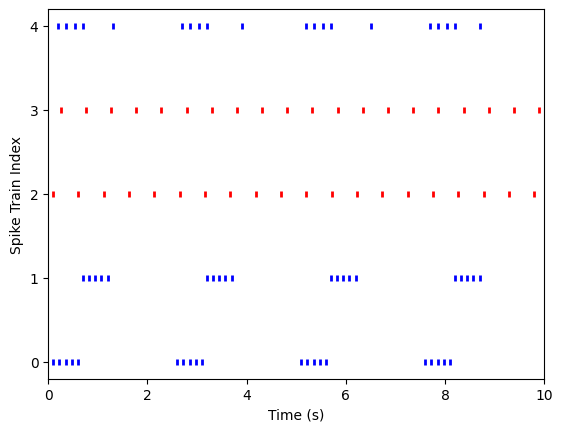

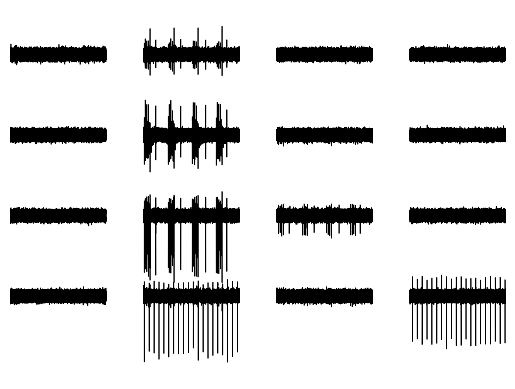

In [ ]:
import MEArec as mr
import matplotlib.pyplot as plt
import neo
import quantities as pq
from pathlib import Path
import numpy as np
import os
import numpy as np
# matplotlib notebook


import numpy as np
import neo
import quantities as pq

duration = 10  # s
t_start = 0
burst_duration = 0.5
n_spikes_per_burst = 5
inter_burst = 2

spike_times = []
cell_types = []

# Neuroni eccitatori: 2 con solo burst
for i in range(2):
    if i == 0:        
        burst_start = 0.1
    else:
        burst_start = 0.7
    st = np.array([])
    while burst_start < duration - burst_duration:
        burst = np.linspace(burst_start, burst_start + burst_duration, n_spikes_per_burst)
        st = np.concatenate((st, burst))
        burst_start += burst_duration + inter_burst
    spike_times.append(st)
    cell_types.append('E')

# Neuroni inibitori: 2 con spike regolari
for i in range(2):
    if i == 0:
        spike_train_start = 0.1
        spike_train_stop = duration - 0.2
    else:
        spike_train_start = 0.25
        spike_train_stop = duration - 0.1
    st = np.linspace(spike_train_start, spike_train_stop, 20)
    spike_times.append(st)
    cell_types.append('I')

# Neurone misto (5° neurone): burst + spike isolati
burst_start = 0.2
st = np.array([])

# Burst
while burst_start < duration - burst_duration:
    burst = np.linspace(burst_start, burst_start + burst_duration, 4)
    st = np.concatenate((st, burst))
    burst_start += burst_duration + inter_burst

# Spike isolati (manuali o casuali)
isolated_spikes = np.array([1.3, 3.9, 6.5, 8.7])
st = np.concatenate((st, isolated_spikes))
st = np.sort(np.unique(st))  # ordina e rimuove duplicati

spike_times.append(st)
cell_types.append('E')  # o 'mixed' se vuoi differenziarlo

# Creazione SpikeTrain con Neo
spike_trains = []
for i, st in enumerate(spike_times):
    spiketrain = neo.SpikeTrain(times=st * pq.s, t_start=t_start*pq.s, t_stop=duration*pq.s)
    spiketrain.annotate(cell_type=cell_types[i])
    spike_trains.append(spiketrain)



spgen = mr.SpikeTrainGenerator(spiketrains=spike_trains)


_ = mr.plot_rasters(spgen.spiketrains, cell_type=True)


template_filename = Path('templates_tetrodes.h5')


template_params = mr.get_default_templates_params()
cell_folder = mr.get_default_cell_models_folder()


template_params['probe'] = 'tetrode'
template_params['n'] = 5


#tempgen = mr.gen_templates(cell_models_folder=cell_folder, params=template_params, verbose=False)


#mr.save_template_generator(tempgen, template_filename)

template_filename = '../templates/templates.h5'



In [ ]:

rec_params = mr.get_default_recordings_params()
rec_params['recordings']['noise_level'] = 5
rec_params['recordings']['filter'] = False
rec_params['recordings']['bursting'] = True
rec_params['recordings']['exp_decay'] = [0.1, 0.7]
rec_params['recordings']['max_burst_duration'] = 800
rec_params['recordings']['bursting_units'] = [0, 1]
rec_params['templates']['min_dist'] = 0.5
rec_params["templates"]["min_amp"] = 100
rec_params["templates"]["max_amp"] = 150



recgen = mr.gen_recordings(params=rec_params, spgen=spgen, templates=template_filename, verbose=False)

mr.plot_recordings(recgen, overlay_templates=False, lw=0.5)

spike_traces = recgen.spike_traces


#
# Plotting the spike traces
# fig, ax = plt.subplots(figsize=(10, 6))   